# Segmentation Contour Plot Example

This work was supported by NIH STTR R42 CA224888.

In [2]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import os

import monai
from segmentation_viz import segmplot

## Load example data

In [3]:
ASSET_PATH = '../assets/'

example_data = [{
    'IMAGE': os.path.join(ASSET_PATH, 'MNI_T1_1mm_stripped_ras.nii.gz'),
    'SEGM': os.path.join(ASSET_PATH, 'overlay0.nii.gz'),
}]

In [5]:
transforms = monai.transforms.Compose([
    monai.transforms.LoadImaged(keys=['IMAGE', 'SEGM'], reader='NibabelReader', as_closest_canonical=True),
    monai.transforms.Orientationd(keys=['IMAGE','SEGM'], axcodes='RAS'),
    monai.transforms.EnsureChannelFirstd(keys=['IMAGE', 'SEGM']),
])

In [8]:
# Transform the data
D = transforms(example_data)

# And convert to one-hot
onehot = monai.transforms.AsDiscrete(to_onehot=156)

I = D[0]['IMAGE']
M = D[0]['SEGM']
N = onehot(M)

## Basic usage

In [9]:
plot_axial = segmplot.PlotSegmentation(
    num_slices=3, 
    slice_spacing=3, 
    slice_axis=3, 
    alpha=0.7, 
    linewidth=2
)


plt.figure('segm', (15,5))
plot_axial(I, [N], cmap_name=['hsv'])
plt.show()


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 1500x500 with 0 Axes>

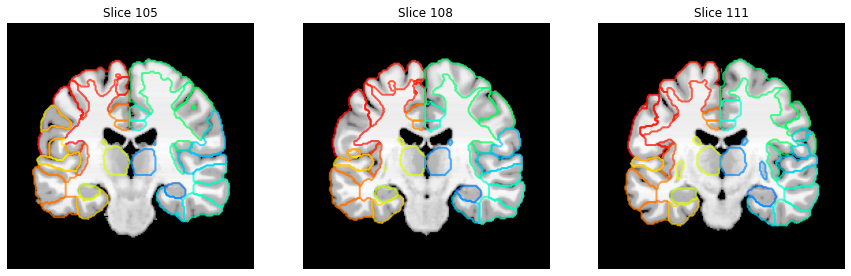

In [6]:
plot_coronal = segmplot.PlotSegmentation(
    num_slices=3, 
    slice_spacing=3, 
    slice_axis=2, 
    alpha=0.7, 
    linewidth=2
)

plt.figure('segm', (15,5))
plot_coronal(I, [N], cmap_name=['hsv'])
plt.show()


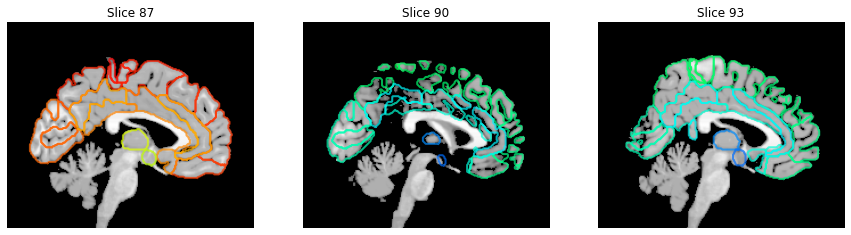

In [7]:
plot_sagittal = segmplot.PlotSegmentation(
    num_slices=3, 
    slice_spacing=3, 
    slice_axis=1, 
    alpha=0.7, 
    linewidth=2
)

plt.figure('segm', (15,5))
plot_sagittal(I, [N], cmap_name=['hsv'])
plt.show()
